# Random forest regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

concrete = pd.read_csv('data/concrete_data.csv')

In [2]:
X = concrete.drop('csMPa', axis=1)
Y = concrete['csMPa']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [4]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
rnd_reg.fit(x_train, y_train)
y_pred = rnd_reg.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8049483547475587

In [5]:
important_features = pd.Series(rnd_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.404165
cement              0.352983
water               0.099441
superplasticizer    0.069338
slag                0.049411
fineaggregate       0.014891
flyash              0.007172
coarseaggregate     0.002600
dtype: float64

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg = BaggingRegressor(DecisionTreeRegressor(splitter='random', max_leaf_nodes=12), 
                                                 n_estimators=600,
                                                 bootstrap=True,
                                                 max_samples=1.0,
                                                 n_jobs=-1)
bag_reg.fit(x_train, y_train)
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.7513923881151909

ExtraTreesRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html     
Extra-Tree Regressor is growing tree even more random by using random thresholds for each features rather than searching for best possible thresholds (like the regular decision tree).

In [8]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
extra_reg.fit(x_train, y_train)
y_pred = extra_reg.predict(x_test)
r2_score(y_test, y_pred)

important_features = pd.Series(extra_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.387007
cement              0.342016
superplasticizer    0.090305
water               0.081427
slag                0.048058
flyash              0.028939
fineaggregate       0.017765
coarseaggregate     0.004484
dtype: float64

# Random forest classification

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [12]:
from sklearn.ensemble import RandomForestClassifier

bank_data = pd.read_csv('data/bank_data_processed.csv')
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

rnd_clf = RandomForestClassifier(n_estimators = 400,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

rnd_clf.fit(x_train, y_train)
y_pred = rnd_clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8125

In [13]:
important_features = pd.Series(rnd_clf.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)
important_features

CD Account            0.423275
Income                0.144015
Age                   0.138014
Mortgage              0.082727
Securities Account    0.070143
Online                0.060943
Family                0.046211
Education             0.034673
dtype: float64

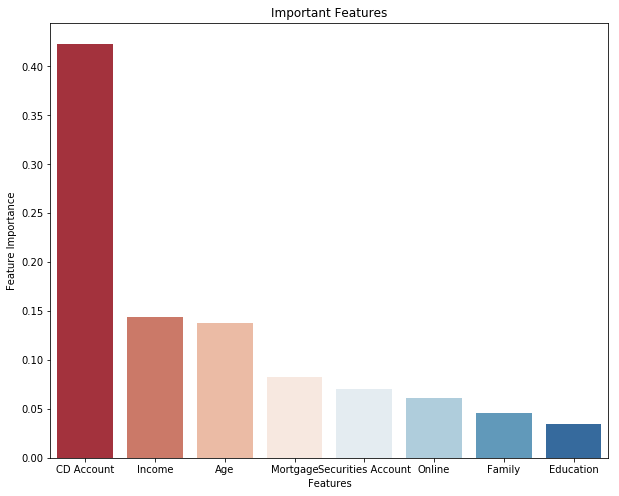

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter ='random', max_leaf_nodes=12), 
                                                   n_estimators = 400, 
                                                   max_samples = 1.0,
                                                   bootstrap = True,
                                                   n_jobs = -1)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8125

ExtraTreesClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html    
Extra-Tree Classifier is growing tree even more random by using random thresholds for each features rather than searching for best possible thresholds(like regular decision tree).

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators = 600,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)
extra_clf.fit(x_train, y_train)

y_pred = extra_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8125